In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import joblib
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = pd.read_csv('gtzan_features_with_augmentation_10sec_segments.csv')
data

,filename,label,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc11_var,mfcc12_var,mfcc13_var,mfcc14_var,mfcc15_var,mfcc16_var,mfcc17_var,mfcc18_var,mfcc19_var,mfcc20_var
0,blues.00000.0.0.wav,blues,0.402616,0.097353,0.056319,0.000821,3535.950530,603169.507342,3239.535510,30197.059970,...,39.992615,30.588913,41.515606,33.526820,44.506897,35.824654,25.729515,32.907745,37.744114,34.256970
1,blues.00000.0.1.wav,blues,0.342190,0.089036,0.124419,0.003155,1845.472515,112527.743546,2132.790549,72044.684542,...,55.469670,45.048626,40.102512,38.005090,52.373150,66.492250,35.037020,40.724440,54.881770,47.104960
2,blues.00000.0.2.wav,blues,0.398992,0.097492,0.054507,0.000781,3284.253805,656281.845119,3140.170775,42316.339003,...,36.382786,36.369530,35.985540,32.080135,46.798950,28.914150,40.987576,47.586445,36.736763,26.362597
3,blues.00000.0.wav,blues,0.342070,0.089073,0.124413,0.003156,1782.836092,116521.944469,2020.991068,84079.610961,...,55.629684,45.939034,41.156006,41.041683,55.765972,69.991180,35.529600,43.518330,58.701084,48.072550
4,blues.00000.1.0.wav,blues,0.384602,0.086270,0.096694,0.001300,2566.478507,215787.948646,2869.968448,82537.307463,...,51.718307,39.691170,30.848093,34.800396,31.761084,24.630606,34.768875,33.339920,28.169940,24.047659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11959,rock.00099.1.wav,rock,0.346727,0.083856,0.053427,0.000101,1596.329929,252575.207299,1875.308171,85495.875609,...,49.238210,39.411920,39.133460,36.528275,71.676640,42.186250,58.694073,69.376200,70.755190,32.127003
11960,rock.00099.2.0.wav,rock,0.353463,0.092506,0.037260,0.000337,1531.522917,594750.265298,1674.937479,342329.781832,...,55.844482,81.261110,54.842420,81.008670,40.851870,50.662758,46.143740,46.401060,53.854780,36.826850
11961,rock.00099.2.1.wav,rock,0.397165,0.086996,0.030149,0.000111,4159.616755,334938.185553,3338.371930,37873.095463,...,21.143707,27.655916,21.840126,22.153889,22.453703,20.499964,22.871008,20.297626,17.390009,20.498178
11962,rock.00099.2.2.wav,rock,0.376433,0.078673,0.032746,0.000098,4332.319206,178178.771856,3349.406780,23956.927829,...,17.069360,19.492040,15.157116,18.452630,17.381535,20.611155,24.044962,28.758825,30.793936,27.770536


In [3]:
X = data.drop(['filename', 'label'], axis=1)
y = data['label']
X = X.values
y = y.values

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
y=to_categorical(label_encoder.fit_transform(y))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, 'scaler_ann.pkl')

['scaler_ann.pkl']

In [4]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def model_evaluation_report(model):

  # Evaluate the model on the test data
  y_pred = model.predict(X_test)
  y_pred_classes = np.argmax(y_pred, axis=1)

  # Inverse transform encoded labels to original labels
  y_test_original = label_encoder.inverse_transform(y_test.argmax(axis=1))
  y_pred_original = label_encoder.inverse_transform(y_pred_classes)

  # Print classification report
  print(classification_report(y_test_original, y_pred_original))

  # Plot the confusion matrix
  conf_matrix = confusion_matrix(y_test_original, y_pred_original)
  plt.figure(figsize=(10, 8))
  sns.heatmap(conf_matrix, cmap='Blues',  annot=True)
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.xticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_, rotation=90)
  plt.yticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_)
  plt.show()

  # Plot accuracy and loss curves
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  best_val_accuracy = max(history.history['val_accuracy'])
  plt.axvline(np.argmax(history.history['val_accuracy']), color='r', linestyle='--', label=f'Best Val Acc ({best_val_accuracy:.4f})')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.axvline(np.argmin(history.history['val_loss']), color='r', linestyle='--', label='Best Val Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.tight_layout()
  plt.show()

In [6]:
# model 1
# Build the deep learning model
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.6))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Define a ModelCheckpoint callback to save the entire model (including architecture and weights)
model_checkpoint = ModelCheckpoint('ann_feature_10sec_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_test, y_test), callbacks=[model_checkpoint])

# Save the label encoder
label_encoder_filename = 'label_encoder.pkl'
import joblib
joblib.dump(label_encoder, label_encoder_filename)

# Evaluate the best model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

Epoch 1/150
65/75 [=========================>....] - ETA: 0s - loss: 2.2856 - accuracy: 0.1373
Epoch 1: val_accuracy improved from -inf to 0.28040, saving model to ann_20_mfccs_model.h5
75/75 [==============================] - 5s 8ms/step - loss: 2.2593 - accuracy: 0.1478 - val_loss: 1.9123 - val_accuracy: 0.2804
Epoch 2/150
66/75 [=========================>....] - ETA: 0s - loss: 1.9359 - accuracy: 0.2782
Epoch 2: val_accuracy improved from 0.28040 to 0.36858, saving model to ann_20_mfccs_model.h5
75/75 [==============================] - 0s 6ms/step - loss: 1.9198 - accuracy: 0.2844 - val_loss: 1.6354 - val_accuracy: 0.3686
Epoch 3/150
66/75 [=========================>....] - ETA: 0s - loss: 1.7205 - accuracy: 0.3582
Epoch 3: val_accuracy improved from 0.36858 to 0.49394, saving model to ann_20_mfccs_model.h5
75/75 [==============================] - 0s 6ms/step - loss: 1.7056 - accuracy: 0.3631 - val_loss: 1.3873 - val_accuracy: 0.4939
Epoch 4/150
67/75 [=========================>....

In [8]:
# Evaluate the best model
# Get the best model's index from the validation accuracy
best_model_index = np.argmax(history.history['val_accuracy'])
best_model_val_accuracy = history.history['val_accuracy'][best_model_index]
best_model_loss = history.history['loss'][best_model_index]
best_model_accuracy = history.history['accuracy'][best_model_index]
best_model_val_loss = history.history['val_loss'][best_model_index]

print(f"Best Model Metrics:")
print(f"Accuracy: {best_model_accuracy:.4f}")
print(f"Validation Accuracy: {best_model_val_accuracy:.4f}")
print(f"Loss: {best_model_loss:.4f}")
print(f"Validation Loss: {best_model_val_loss:.4f}")

Best Model Metrics:
Accuracy: 0.9335
Validation Accuracy: 0.9348
Loss: 0.2498
Validation Loss: 0.2450


75/75 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

       blues       0.98      0.95      0.97       247
   classical       0.94      0.99      0.96       234
     country       0.89      0.94      0.91       236
       disco       0.89      0.94      0.91       252
      hiphop       0.96      0.89      0.93       247
        jazz       0.95      0.92      0.94       229
       metal       0.96      0.96      0.96       247
         pop       0.97      0.93      0.95       251
      reggae       0.91      0.95      0.93       218
        rock       0.89      0.88      0.89       232

    accuracy                           0.93      2393
   macro avg       0.94      0.93      0.93      2393
weighted avg       0.94      0.93      0.93      2393



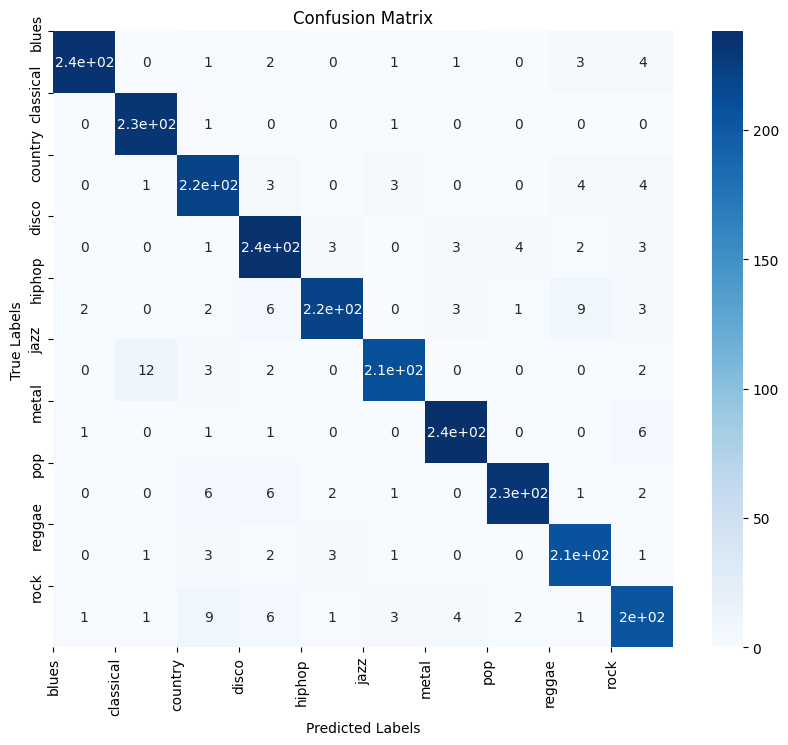

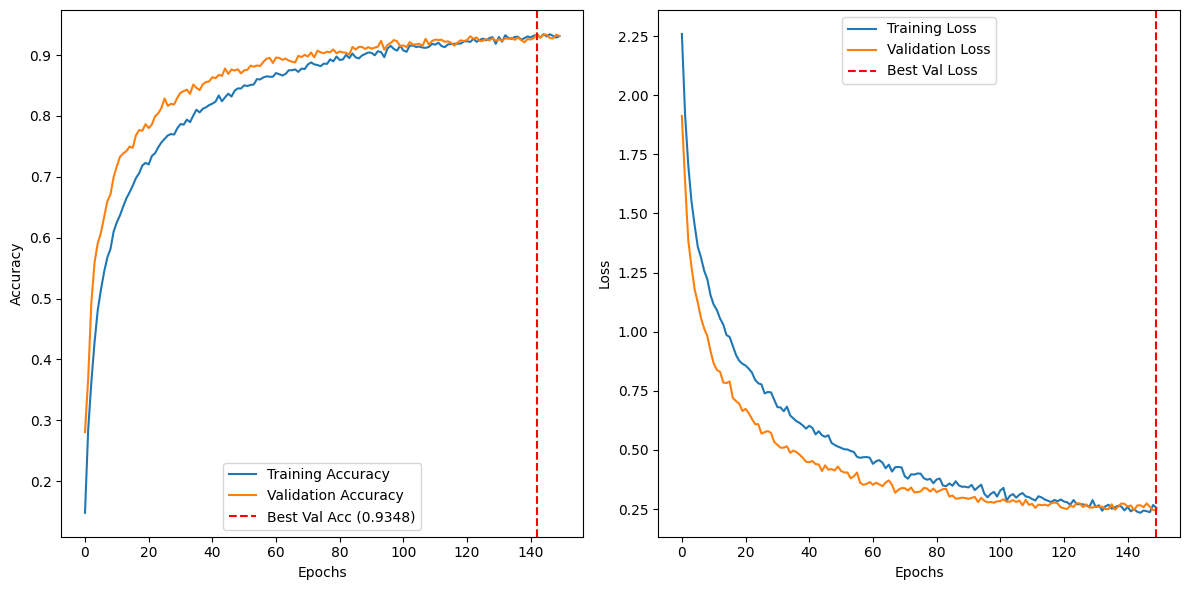

In [7]:
# Load the saved model
model = tf.keras.models.load_model('ann_feature_10sec_model.h5')
model_evaluation_report(model)

## cnn model

In [17]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.5))

model.add(layers.Conv1D(128, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.6))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Define a ModelCheckpoint callback to save the entire model (including architecture and weights)
model_checkpoint = ModelCheckpoint('cnn_feature_10sec_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_data=(X_test, y_test), callbacks=[model_checkpoint])

# Evaluate the best model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')


Epoch 1/500
149/150 [============================>.] - ETA: 0s - loss: 2.3148 - accuracy: 0.1027
Epoch 1: val_accuracy improved from -inf to 0.23318, saving model to cnn_20_mfccs_model.h5
150/150 [==============================] - 6s 10ms/step - loss: 2.3147 - accuracy: 0.1028 - val_loss: 2.2937 - val_accuracy: 0.2332
Epoch 2/500
149/150 [============================>.] - ETA: 0s - loss: 2.1630 - accuracy: 0.1748
Epoch 2: val_accuracy did not improve from 0.23318
150/150 [==============================] - 1s 8ms/step - loss: 2.1626 - accuracy: 0.1750 - val_loss: 2.0294 - val_accuracy: 0.2177
Epoch 3/500
141/150 [===========================>..] - ETA: 0s - loss: 1.9748 - accuracy: 0.2381
Epoch 3: val_accuracy improved from 0.23318 to 0.26243, saving model to cnn_20_mfccs_model.h5
150/150 [==============================] - 1s 9ms/step - loss: 1.9718 - accuracy: 0.2397 - val_loss: 1.9526 - val_accuracy: 0.2624
Epoch 4/500
141/150 [===========================>..] - ETA: 0s - loss: 1.8848 -

In [18]:
# Evaluate the best model
# Get the best model's index from the validation accuracy
best_model_index = np.argmax(history.history['val_accuracy'])
best_model_val_accuracy = history.history['val_accuracy'][best_model_index]
best_model_loss = history.history['loss'][best_model_index]
best_model_accuracy = history.history['accuracy'][best_model_index]
best_model_val_loss = history.history['val_loss'][best_model_index]

print(f"Best Model Metrics:")
print(f"Accuracy: {best_model_accuracy:.4f}")
print(f"Validation Accuracy: {best_model_val_accuracy:.4f}")
print(f"Loss: {best_model_loss:.4f}")
print(f"Validation Loss: {best_model_val_loss:.4f}")

Best Model Metrics:
Accuracy: 0.9208
Validation Accuracy: 0.9110
Loss: 0.3227
Validation Loss: 0.3401


75/75 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       blues       0.94      0.91      0.92       247
   classical       0.93      0.98      0.96       234
     country       0.86      0.91      0.88       236
       disco       0.89      0.88      0.88       252
      hiphop       0.90      0.91      0.91       247
        jazz       0.93      0.91      0.92       229
       metal       0.95      0.93      0.94       247
         pop       0.95      0.90      0.92       251
      reggae       0.88      0.94      0.91       218
        rock       0.87      0.84      0.85       232

    accuracy                           0.91      2393
   macro avg       0.91      0.91      0.91      2393
weighted avg       0.91      0.91      0.91      2393



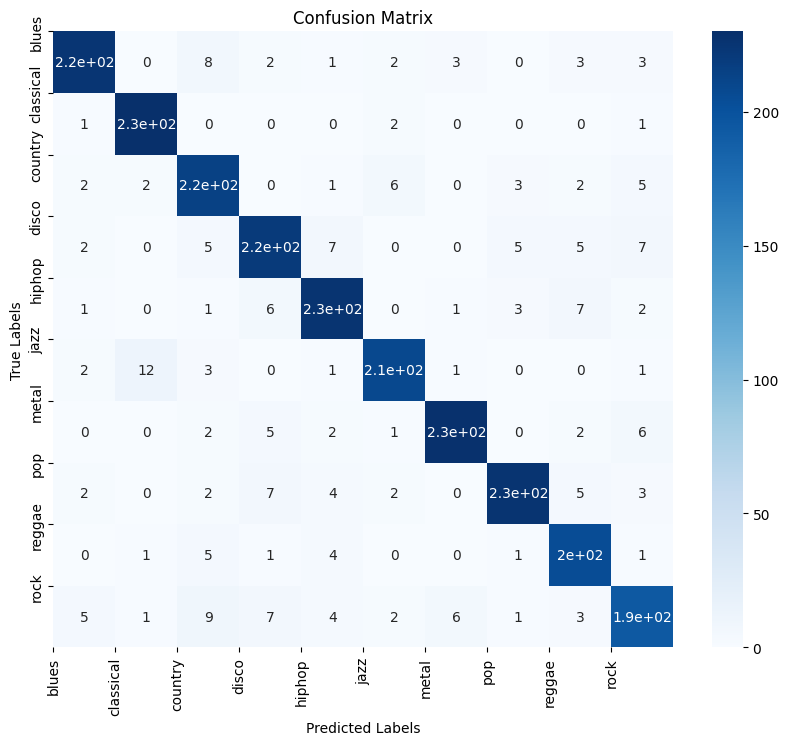

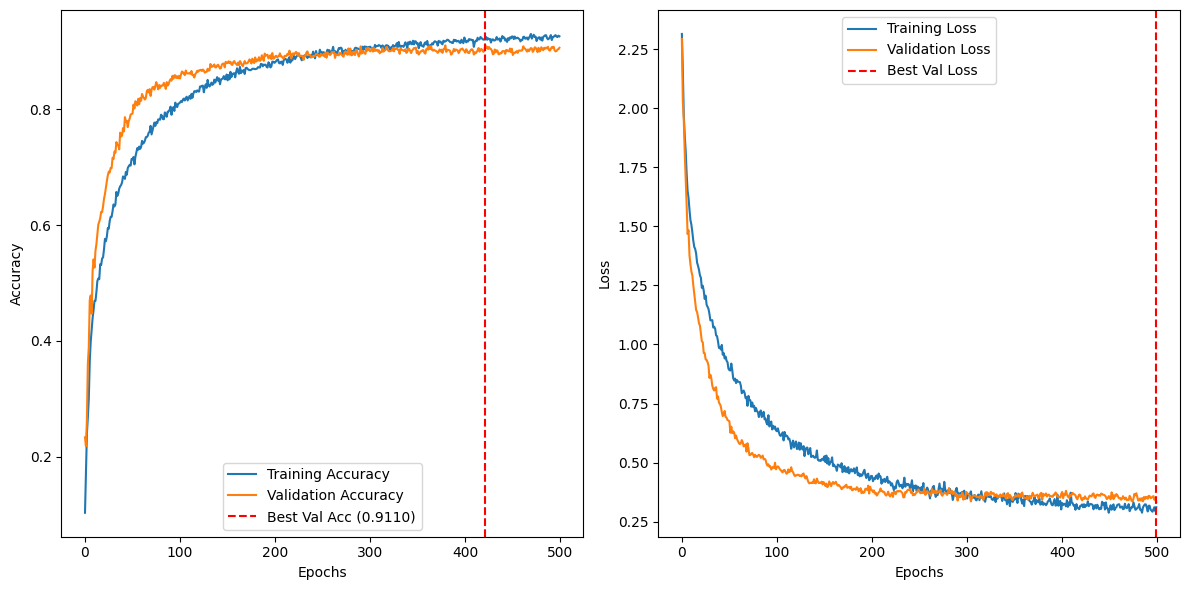

In [20]:
# Load the saved model
model = tf.keras.models.load_model('cnn_feature_10sec_model.h5')
model_evaluation_report(model)